In [1]:
from module.SOMCluster import SelfOrganisingMap

SOM = SelfOrganisingMap() 

In [2]:
import pandas as pd

%store -r t
data = pd.read_csv('./fakeData/data' + t +'.csv')

# X = data[['valueLog','sex', 'marketing','moveFreq', 'premsFreq', 'premsMedian','traceability']].to_numpy()
# X = data[['sex', 'latitude', 'long', 'valueLog',
#    'marketing', 'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
#    'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']].to_numpy()

X = data[['sex', 'valueLog',
       'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
       'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']].to_numpy()

y = data['goneAway'].to_list()

path = './SOM'

In [3]:
results, best, som = SOM.train_som(X)

C:\Users\dompa\anaconda3\lib\site-packages\minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


The best parameters are: (25, 2, 2, 1000, 'gaussian')


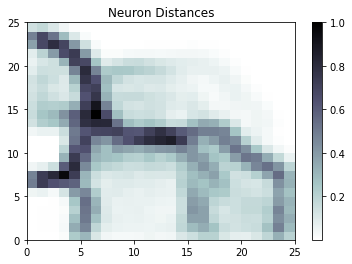

In [4]:
SOM.makeDistanceMap(som, path=path, show = True)

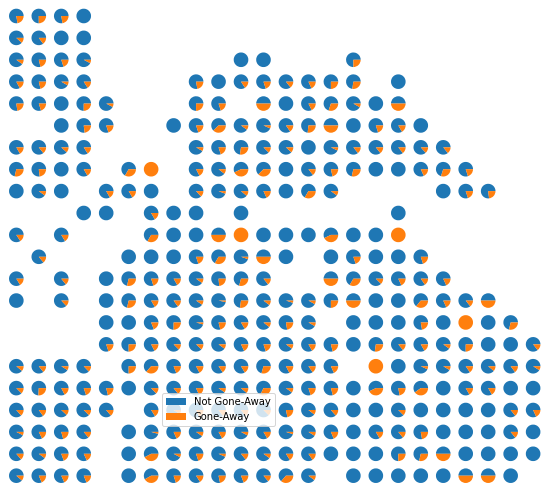

<module 'matplotlib.pyplot' from 'C:\\Users\\dompa\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
SOM.makeLabelledSOM(som, X, ['Not Gone-Away','Gone-Away'], y,best, title='Gone-Away', path = path, show=True)

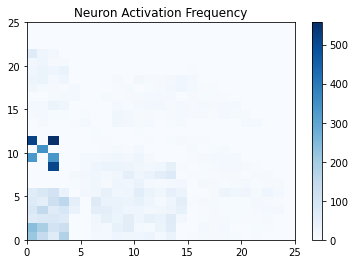

<module 'matplotlib.pyplot' from 'C:\\Users\\dompa\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [7]:
SOM.makeFrequencyMap(som,X,show=True)

In [8]:
unique_winners, winnerscat, big_neurons = SOM.return_unique_winners(som, X, return_cat = True, return_big_neurons = True)
data['cluster'] = winnerscat

In [9]:
try:
    SOM.progressiveStatistical(big_neurons, data)
except:
    print('No big neurons')

No big neurons


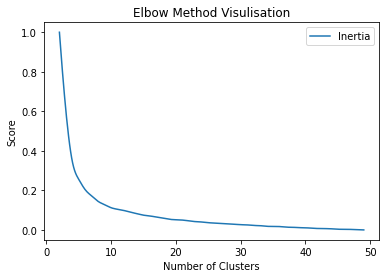

In [12]:
labels = SOM.SOMKmeans(som, returnLabelsShaped= True, path = path)

In [13]:
kmeanslabels = SOM.SOMKmeansWinners(som, X, labels)

In [14]:
import numpy as np
np.unique(kmeanslabels, return_counts = True)

(array([0, 1, 2, 3, 4]), array([2781,  598,  607, 2784, 3230], dtype=int64))

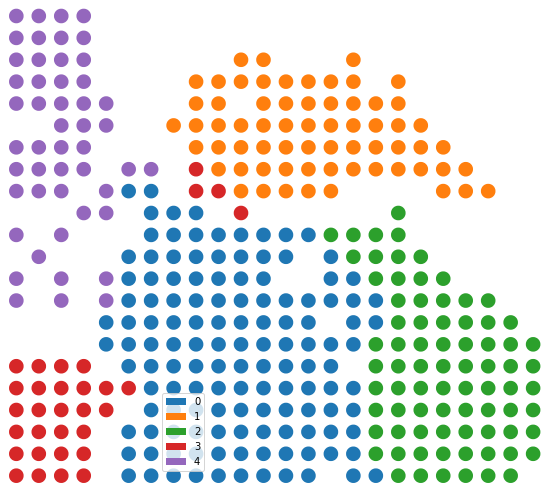

<module 'matplotlib.pyplot' from 'C:\\Users\\dompa\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [15]:
SOM.makeLabelledSOM(som, X, list(range(max(kmeanslabels)+1)), kmeanslabels, best,title ='clusters', path=path, show =True)

In [16]:
data['cluster'] = kmeanslabels
data.to_csv('./fakeData/labelledDataSOM' + t +'.csv', index = False)